<a href="https://colab.research.google.com/github/Seele00/Physics305Astro/blob/master/Phys305Astro_lab_assignment_module2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PS305 Lab Assignment** 
## Module 2: Cross-matching with binary search

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1, 2, and 3 are worth 30, 50, and 20 points, respectively).

_Due Date_: **5PM of October 8 (Thu)**

_Credit_: This assignment is based on the Week 2 module of the Coursera course "Data-driven Astronomy", "Cross-matching with k-d trees" ([link](https://www.coursera.org/learn/data-driven-astronomy/home/welcome))

### Student Information 

_Full Name (Last Name, First Name)_: Dizon, Gabriel Luis\
_Student No._: 2011-18116\
_Section_: WFY

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Gabriel Luis Dizon

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/50
* Part 3 - []/20

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 0

#### PART 1: Get angular distances *(30 pts.)*

Write a function ```angular_dist``` that outputs the angular distance separation (in radians) between a given RA and declination  ```(ra1, dec1)``` and an array of coordinates, given by ```ra2s, dec2s```. 

Here's an example of how your function should work:

```
>>> import numpy as np
>>> ra1, dec1 = np.radians([180, 30])
>>> cat2 = [[180, 32], [55, 10], [302, -44]]
>>> cat2 = np.radians(cat2)
>>> ra2s, dec2s = cat2[:,0], cat2[:,1]
>>> dists = angular_dist(ra1, dec1, ra2s, dec2s)
>>> print(np.degrees(dists))
array([   2.        ,  113.72587199,  132.64478705])
```

# Discusssion for Part 1
The code below for `angular_dist` takes radian inputs of the RA and declination `r1` and `d1` from the first catalogue and takes radian arrays `r2s` and `d2s` from the second catalogue. Note that `r1` and `d1` are single-element inputs. Thus, if your first catalogue contains a list of coordinates, then you must go through each coordinate first before inputting it into the function.

To compute for the angular distance $d$ between two points $(\alpha_1, \delta_1)$ and $(\alpha_2, \delta_2)$, we start with the following quantities:
\begin{align}
a &= \sin^2\left(\frac{|\delta_1-\delta_2|}{2}\right),\\
b &= \cos\delta_1\cos\delta_2\sin^2\left(\frac{|\alpha_1-\alpha_2|}{2}\right),
\end{align}
where $\alpha_i, \delta_i$ are the RA and declination coordinates, respectively.

$d$ can then be calculated as a function of $a$ and $b$:
\begin{equation}
d = 2\sin^{-1}\sqrt{a+b}.
\end{equation}

Note that $d$ here is given in _radians_. The `angular_dist` function below outputs an array of angular distances between the `(r1, d1)` coordinate from the first catalogue and the `(r2s, d2s)` coordinates from the second catalogue.

In [ ]:
import numpy as np

def angular_dist(r1, d1, r2s, d2s):
  distances = [] #initialize array of angular distances
  
  #takes angular distance of (r1, d1) to each element in the second catalogue, appends to distance array
  for i in range(r2s.size):
    a = (np.sin(abs(d1 - d2s[i])/2))**2
    b = np.cos(d1)*np.cos(d2s[i])*(np.sin(abs(r1 - r2s[i])/2))**2
  
    d = 2*np.arcsin(np.sqrt(a + b))
    distances.append(d)

  return np.array(distances)

To test our function, we use the test case outlined above. As expected, `angular_dist` gives the correct output.

In [ ]:
ra1, dec1 = np.radians([180, 30])
cat2 = [[180, 32], [55, 10], [302, -44]]
cat2 = np.radians(cat2)
ra2s, dec2s = cat2[:,0], cat2[:,1]
dists = angular_dist(ra1, dec1, ra2s, dec2s)
print(np.degrees(dists))

[  2.         113.72587199 132.64478705]


#### PART 2: Write a crossmatch function *(50 pts.)*

Now, you will use the ```angular_dist``` function in Part 1 to write a crossmatch function for two catalogues to within a maximum radius. The catalogues are 2D NumPy arrays of RA and declination in degrees. 

Your function should convert all the coordinates to radians before it starts crossmatching. It should return 3 values:

* A list of tuples of matched IDs and their distance in degrees;
* A list of unmatched IDs from the first catalogue;
* The time taken (in seconds) to run the crossmatcher.

Both catalogues are given as an N×2 NumPy array of floats. Each row contains the coordinates of a single object. The two columns are the RA and declination.

An object's ID is the index of its row, starting at 0. Your function should work with input catalogues with any number of objects.

Here's an example of how your function should work:

```
cat1 = np.array([[180, 30], [45, 10], [300, -45]])
cat2 = np.array([[180, 32], [55, 10], [302, -44]])
matches, no_matches, time_taken = crossmatch(cat1, cat2, 5)
>>> print('matches:', matches)
matches: [(0, 0, 2.0000000000000027), (2, 2, 1.7420109046547023)]
>>> print('unmatched:', no_matches)
unmatched: [1]
>>> print('time taken:', time_taken)
time taken: 0.00022228599118534476
```

To make this function efficient, you should only loop through objects in the second catalogue with declinations between ```dec1 - max_radius``` and ```dec1 + max_radius``` using binary search.

Your crossmatch should use ```np.searchsorted``` to find the starting point (just before ```dec1 - max_radius```) and then break out of the loop when the declination reaches ```dec1 + max_radius```. Note that ```np.searchsorted``` assumes that the input array is sorted ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.searchsorted.html)). 

# Discussion for Part 2

The `crossmatch` function below takes three inputs: `c1` contains all the coordinates from the first catalogue, `c2` contains coordinates from the second catalogue, and `max_radius` sets the upper bound of angular distances with which we could say two coordinates are matched. The function assumes that all inputs are in _degrees_, and are converted to radians prior to any significant calculation. \

The function loops over two sets of indices. The first index goes through the coordinates of the first catalogue, where the `minimum` and `maximum` range of values are computed for a particular declination, which is then used by `np.searchsorted` to constrain the search space [1]. `angular_dist` is then used to compute for the angular distances between the $i$th first catalogue coordinate and all the coordinates within the constrained second catalogue.

Once all distances for the $i$th first catalogue coordinate are computed, we then check if the distances lie within the `max_radius` specified. If a distance is less than or equal to the maximum radius, then it is considered a "match", and the indices of the matched coordinates along with their angular distance (in degrees) are recorded as a tuple. If it is greater than the maximum distance, then the index of the unmatched coordinate from the first catalogue is recorded [1]. The final output returns the matched indices, the unmatched indices, and the time taken to run the entire crossmatching process.

-------------------------------------------------------------

Note [1] - I am pretty confident that I failed to properly constrain the search space for the second catalogue, for reasons I will outline in the code and discussion below. Nonetheless, I also detail below how I circumvented this issue, and while the code is marginally less efficient than desired, it's still within an order of magnitude of the expected run time.

In [ ]:
import time

def crossmatch(c1, c2, max_radius):
  start_time = time.clock() #starting time index for running crossmatch

  #convert all input quantities to radians prior to calculation
  c1_rad, c2_rad = np.radians(c1), np.radians(c2)
  ra1s, dec1s = c1_rad[:,0], c1_rad[:,1]
  ra2s, dec2s = c2_rad[:,0], c2_rad[:,1]

  max_radius_rad = np.radians(max_radius)

  #initializing the lists for matched and unmatched coordinates
  matchlist = []
  unmatchlist = []

  #initializing a set of indices containing all matched coordinates of the first catalogue
  matchset = set()

  #crossmatching starts here
  for i in range(dec1s.size):
    minimum, maximum = dec1s[i] - max_radius, dec1s[i] + max_radius 
    #define minimum and maximum values to search for within the second catalogue, see discussion below for issues/caveat

    start_index, end_index = np.searchsorted(dec2s, minimum), np.searchsorted(dec2s, maximum) 
    #sets the starting and ending indices with which to slice the second catalogue arrays for optimized searching
    
    ra_sliced, dec_sliced = ra2s[start_index:end_index], dec2s[start_index:end_index] #sliced second catalogue arrays

    dists = angular_dist(ra1s[i], dec1s[i], ra_sliced, dec_sliced) #angular distance calculation

    #check if distances are within maximum radius
    for k in range(len(dists)):
      if dists[k] <= max_radius_rad:
        matchlist.append((i, start_index + k, np.degrees(dists[k])))
        matchset.add(i)
      elif dists[k] > max_radius_rad:
        unmatchlist.append(i)
  
  #unmatchlist likely has duplicate and excess entries because -the search space in the second catalogue wasn't properly constrained-
  #to compensate, I define unmatchset as the python set of indices that are tagged unmatched -regardless if they already had a match in matchset-
  #I then subtract the elements of unmatchset with matchset to obtain the final list of unmatched indices in final_unmatched
  unmatchset = set(unmatchlist)
  final_unmatched = np.array(list(unmatchset - matchset))

  end_time = time.clock() - start_time #total elapsed time of the crossmatch program

  return matchlist, final_unmatched, end_time

As pointed out in the code, there is an issue with constraining the search space using the `np.searchsorted` function. I explain the issues in detail in the following. \

Note this section of code defining the minimum and maximum declination to sweep through :
```
minimum, maximum = dec1s[i] - max_radius, dec1s[i] + max_radius
```
In the code, all declinations have been converted to radians for calculation. However, `max_radius` is still in degrees, which severely expands the values of `minimum` and `maximum`. As a result, the search space is almost completely unconstrained, and the entire catalogue is effectively searched by the crossmatch function. Attempts have been made to properly implement the constraint using `max_radius_rad`, however it leads to empty arrays for `ra_sliced` and `dec_sliced` (`max_radius_rad` is still used in the distance checking, so the distances shown are still valid). I suspect this is mainly due to the declinations being generally unordered in `dec2s`, and attempts to use `np.argsort` have been unsuccessful, in due part because I do not understand how `argsort` works, and because I could not figure out how to loop through second catalogue without disturbing the original index order.

-------------------------------------------------------------------------
Despite the limitations of the above code, applying the test case still yields the desired results, albeit with slower run time. Note however that the run time is still in the same order of magnitude as the test case above. This is sufficient for the comparisons we will discuss in Part 3 regarding the run time at larger catalogue sizes.

In [ ]:
cat1 = np.array([[180, 30], [45, 10], [300, -45]])
cat2 = np.array([[180, 32], [55, 10], [302, -44]])
matches, no_matches, time_taken = crossmatch(cat1, cat2, 5)
print('matches:', matches)
print('unmatched:', no_matches)
print('time taken:', time_taken)

matches: [(0, 0, 2.0000000000000027), (2, 2, 1.7420109046547023)]
unmatched: [1]
time taken: 0.0004830000000000112


#### PART 3: Test your function for a random catalog *(20 points)*

Use the ```create_cat``` function and sample code below to test your crossmatch function on 3 random catalogs of different sizes. Comment on how the time taken changes with catalog size.

```
  # A function to create a random catalogue of size n
  def create_cat(n):
    ras = np.random.uniform(0, 360, size=(n, 1))
    decs = np.random.uniform(-90, 90, size=(n, 1))
    return np.hstack((ras, decs))

  # Test your function on random inputs
  np.random.seed(0)
  cat1 = create_cat(10)
  cat2 = create_cat(20)
  matches, no_matches, time_taken = crossmatch(cat1, cat2, 5)
  print('matches:', matches)
  print('unmatched:', no_matches)
  print('time taken:', time_taken)
 ``` 

# Discussion for Part 3
We use the sample code above to check how fast the crossmatch function runs at different catalog sizes. For an initial run, we generate three random catalogs of size 10, 100, and 1000. The catalogues will be crossmatched following the rule $\mathrm{Size(Catalogue 1)} <= \mathrm{Size(Catalogue 2)}$, and the maximum radius is set to 5.

In [ ]:
# A function to create a random catalogue of size n
def create_cat(n):
  ras = np.random.uniform(0, 360, size=(n, 1))
  decs = np.random.uniform(-90, 90, size=(n, 1))
  return np.hstack((ras, decs))
 
# Test your function on random inputs
np.random.seed(0)
cat1 = create_cat(10)
cat2 = create_cat(100)
cat3 = create_cat(1000)
matches, no_matches, time_taken = crossmatch(cat1, cat2, 5)
print('Cat1 (size 10) vs Cat2 (size 100)')
print('matches:', matches)
print('unmatched:', no_matches)
print('time taken:', time_taken)
print('--------')
matches, no_matches, time_taken = crossmatch(cat1, cat3, 5)
print('Cat1 (size 10) vs Cat3 (size 1000)')
print('matches:', matches)
print('unmatched:', no_matches)
print('time taken:', time_taken)
print('--------')
matches, no_matches, time_taken = crossmatch(cat2, cat3, 5)
print('Cat2 (size 100) vs Cat3 (size 1000)')
print('matches:', matches)
print('unmatched:', no_matches)
print('time taken:', time_taken)

Cat1 (size 10) vs Cat2 (size 100)
matches: [(2, 16, 3.4654860929393334), (3, 64, 2.3038154656405854), (4, 51, 4.340608056518414), (6, 53, 3.5061935683939476), (6, 84, 4.564232953586541), (9, 45, 3.379093796048554)]
unmatched: [0 1 5 7 8]
time taken: 0.01607999999999965
--------
Cat1 (size 10) vs Cat3 (size 1000)
matches: [(0, 999, 4.137533313950548), (1, 728, 4.545274510948654), (1, 838, 0.6196275825918045), (1, 966, 3.477406453973277), (3, 396, 3.7976879881065972), (3, 472, 4.768118025520312), (3, 704, 0.891170588505213), (4, 656, 4.823592000356963), (5, 135, 3.854448712398085), (5, 168, 3.0804966705891146), (5, 211, 3.9453752984350947), (5, 427, 1.9256450271122387), (5, 515, 3.8278117046009), (5, 967, 4.95913108363911), (6, 14, 3.6312241647115884), (6, 62, 4.017510097290618), (6, 74, 2.021414260953343), (6, 161, 1.8771005692814084), (6, 187, 4.953758420601603), (6, 250, 1.4995097211029893), (6, 275, 4.8082465176090885), (6, 412, 4.061876105018039), (6, 413, 3.5824290136383827), (6, 4

As we can see from above, there is a noticeable pattern in increasing the catalogue size. Increasing the size of either catalogue by a factor of 10 also increases the run time by an equivalent factor of 10. Increasing both catalogue sizes simultaneously by a factor of 10 inflates the run time by a factor of 100. We perhaps can best illustrate this in the following plot.

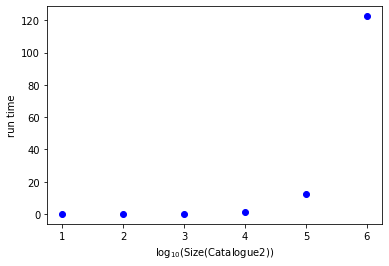

In [20]:
import matplotlib.pyplot as plt

log_linspace = np.linspace(1, 6, 6)
time_space = []
cata1 = create_cat(10)

for i in log_linspace:
  cata2 = create_cat(int(10**i))

  matches, no_matches, time_taken = crossmatch(cata1, cata2, 5)
  time_space.append(time_taken)

plt.plot(log_linspace, time_space, 'bo')
plt.xlabel(r'$\log_{10}(\mathrm{Size(Catalogue 2)})$')
plt.ylabel("run time (seconds)")
plt.show()

Setting the size of the first catalogue at 10, the above plot shows the effect of increasing the size of the second catalogue by factors of 10 on the run time. The difference in run time between catalog size $10^5$ and $10^6$ is noticeable enough that it becomes impractical to use binary search for crossmatching between large catalogues of data.

[SCORE BREAKDOWN] 

Part 1:
* Correctness of Code: []/15
* Discussion: []/15
* Subtotal: []/30

Part 2:
* Correctness of Code: []/25
* Discussion: []/25
* Subtotal: []/50

Part 3:
* Correctness of Code: []/10
* Discussion: []/10
* Subtotal: []/20

Feedback: 